# Statystyka matematyczna - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: 2.24
Członkowie: Jakub Milasz 414584, Bartosz Pietrucha 414678, Miłosz Pabis 417356

---

# Zestaw zadań 7: Estymacja nieparametryczna

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KernelDensity

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Dane do zadań

W celu wygenerowania danych wykonaj poniższą komórkę.

In [3]:
# Dane do testów 1
sample = pd.DataFrame(data=np.concatenate([sp.stats.norm.rvs(loc=4, scale=0.2, size=45, random_state=7), sp.stats.norm.rvs(loc=5.5, scale=0.4, size=85, random_state=2159)]), columns=["X"])
sample.head()

,X
0,4.338105
1,3.906813
2,4.006564
3,4.081503
4,3.842215


### Zadanie 1: Histogram [5 pkt]

#### a) Przygotowanie wykresów

Korzystając z funkcji `seaborn.histplot()`przygotuj histogramy częstości zestawu danych zawartego w zmiennej `sample`.

Wykresy zestaw na pojedynczej figurze (2x3 pola na wykres). Przygotowując figurę kieruj się wytycznymi z początku notatnika. Podczas wykonywania kolejnych histogramów:
 - nie ustawiaj żadnych wartość określających podział na przedziały oraz granice przedziałów,
 - ustaw wyłącznie liczbę przedziałów na 20,
 - ustaw wyłącznie szerokość przedziałów na 0.3,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.05,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.15,
 - ustaw granice przedziałów od 2 do 8 z krokiem 0.4.
 
Do każdego z wykresów dodaj wizualną reprezentację zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej histogramu. Ustaw identyczne zakresy osi dla wszystkich wykresów.

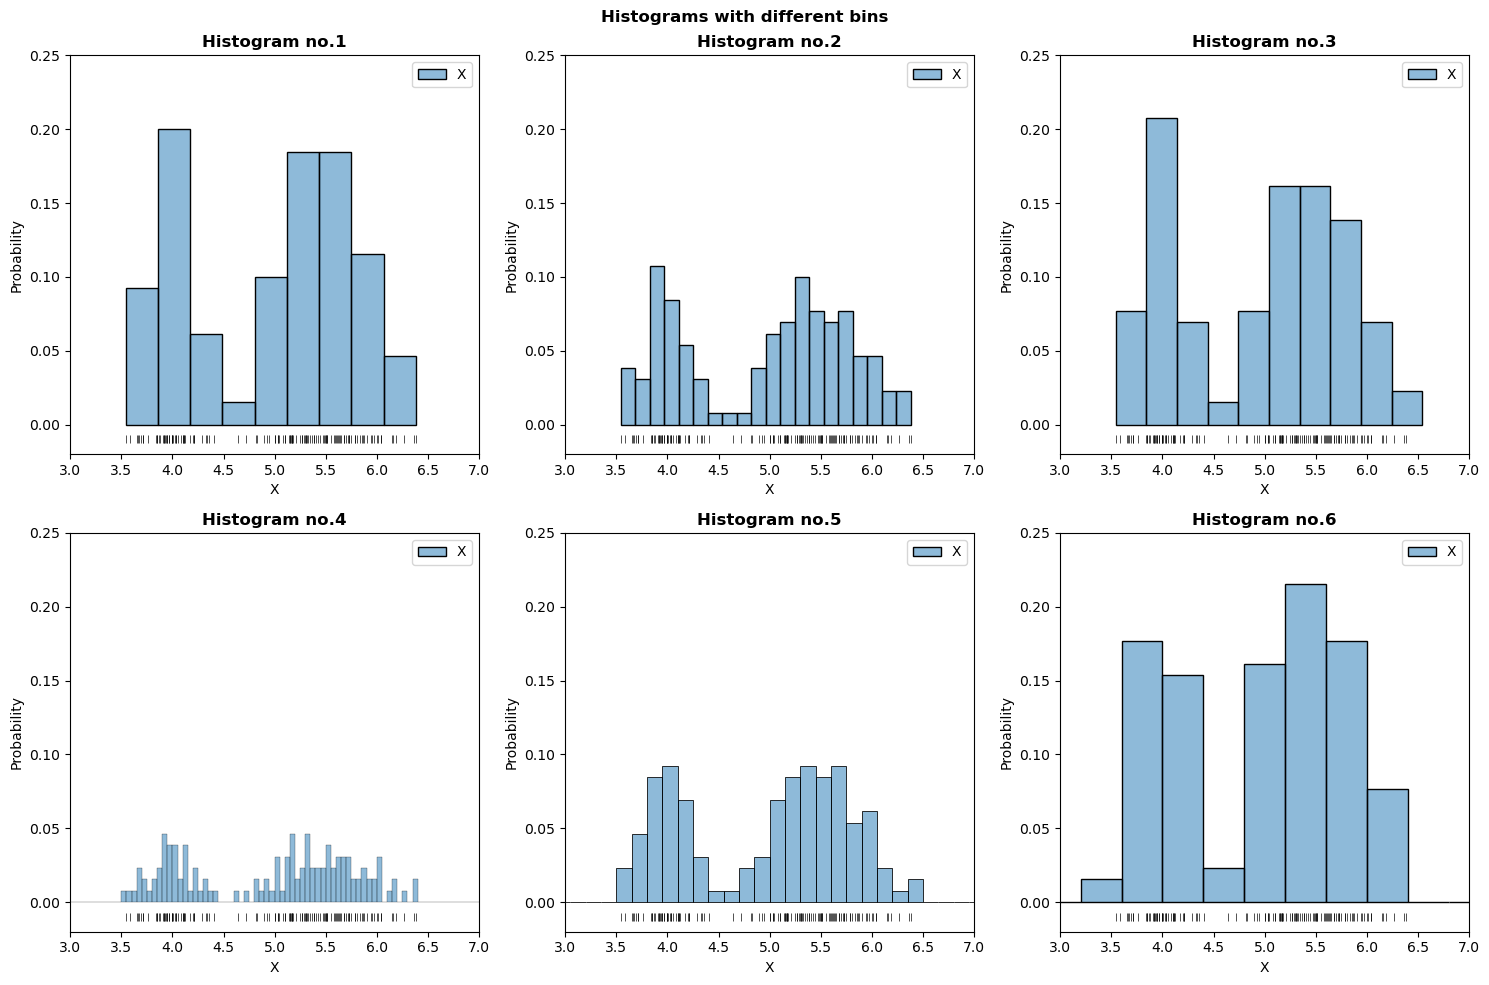

In [4]:
# standardowo tworzymy figurę z plt
fig, axes = plt.subplots(2, 3, figsize=(15,10))
sns.histplot(data=sample, stat='probability', ax=axes[0,0])
sns.histplot(data=sample, stat='probability', bins=20, ax=axes[0,1])
sns.histplot(data=sample, stat='probability', binwidth=0.3, ax=axes[0,2])
sns.histplot(data=sample, stat='probability', bins=np.arange(2, 8, 0.05), ax=axes[1,0])
sns.histplot(data=sample, stat='probability', bins=np.arange(2, 8, 0.15), ax=axes[1,1])
sns.histplot(data=sample, stat='probability', bins=np.arange(2, 8, 0.4), ax=axes[1,2])

# dodanie kresek poniżej
for idx, ax in zip(range(1, 7), axes.flatten()): # pabisowe wymysły z numerowaniem histogramów
    sns.scatterplot(data=sample, x="X", y=-0.01, ax=ax, marker="|", color='k')
    ax.set_title(f"Histogram no.{idx}", weight="bold")

plt.setp(axes, xlim=[3, 7], ylim=[-0.02, 0.25])
fig.suptitle("Histograms with different bins", weight="bold")
plt.tight_layout()

plt.show()

### Zadanie 2: Estymacja funkcją jądrową [16 pkt]

#### a) Estymacji funkcjami jądrowymi od podstaw

Przygotuj funkcję `simple_kde_estimation()`, która będzie dokonywała estymacji nieparametrycznej metodą funkcji jądrowych z wykorzystaniem jądra w postaci rozkładu normalnego o odchyleniu normalnym $\sigma$ zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres zawierający wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci zbioru symboli (| lub +) zlokalizowanych poniżej wykresu.

Uwagi do wykonania zadania:
 - Punkty estymacji wygeneruj za pomocą funkcji `numpy.linspace()` lub `numpy.arange()`.
 - Wartości gęstości prawdopodobieństwa oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.norm`.
 - Przygotowując figurę kieruj się wytycznymi z początku notatnika.

In [5]:
def simple_kde_estimation(data, estimation_points, sigma):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    estimation_points: int
        Liczba punktów estymacji funkcji gęstości prawdopodobieństwa.
    sigma: float
        Odchylenie standardowe rozkładu normalnego wykorzystywanego jako jądro funkcji.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco punkty estymacji funkcji gęstości prawdopodobieństwa,
        KDE - wyestymowane wartości funkcji gęstości prawdopodobieństwa.
    """
    xmin = data['X'].min()
    xmax = data['X'].max()
    X = np.linspace(xmin-3*sigma, xmax+3*sigma, estimation_points)
    d = X[1] - X[0]
    temp = np.array([np.sum(sp.stats.norm.pdf(data['X'], loc=xi, scale=sigma)) for xi in X])
    KDE = temp / np.sum(temp*d)
    df = pd.DataFrame({"X": X, "KDE": KDE})
    fig, ax = plt.subplots(figsize=(10,10))
    sns.lineplot(data=df, x="X", y="KDE", ax=ax)
    # fill_between wypełnia wykres wewnątrz
    plt.fill_between(df.X.values, df.KDE.values, alpha=0.4)
    sns.scatterplot(data=sample, x="X", y=-0.01, ax=ax, marker="|", color='k')
    ax.set_title("Simple KDE estimation", weight='bold')
    return df

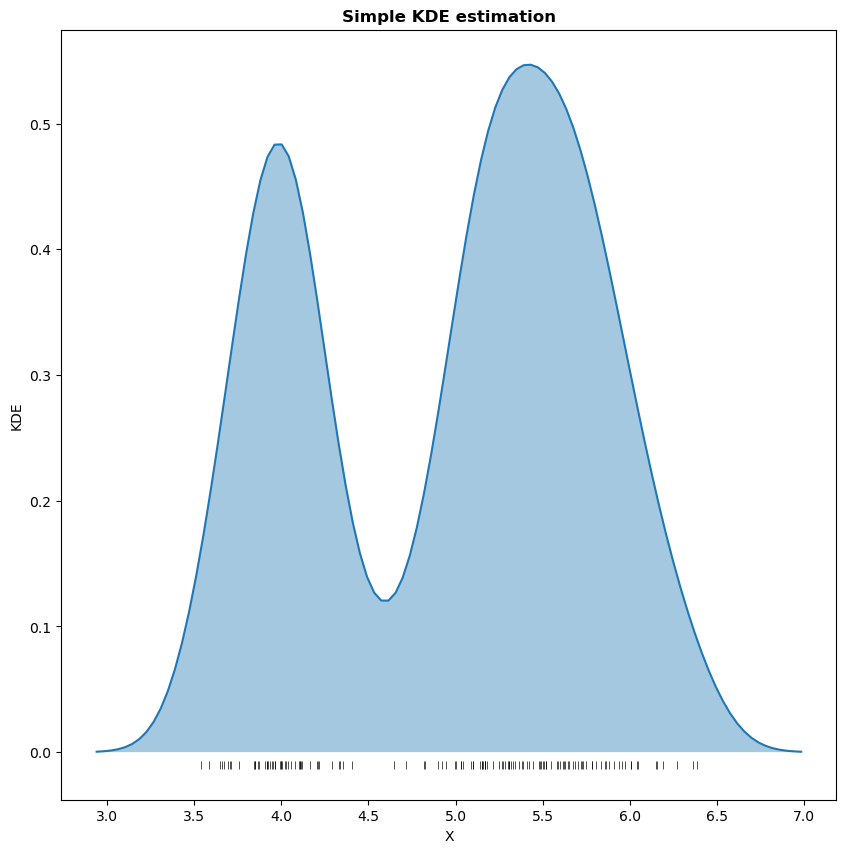

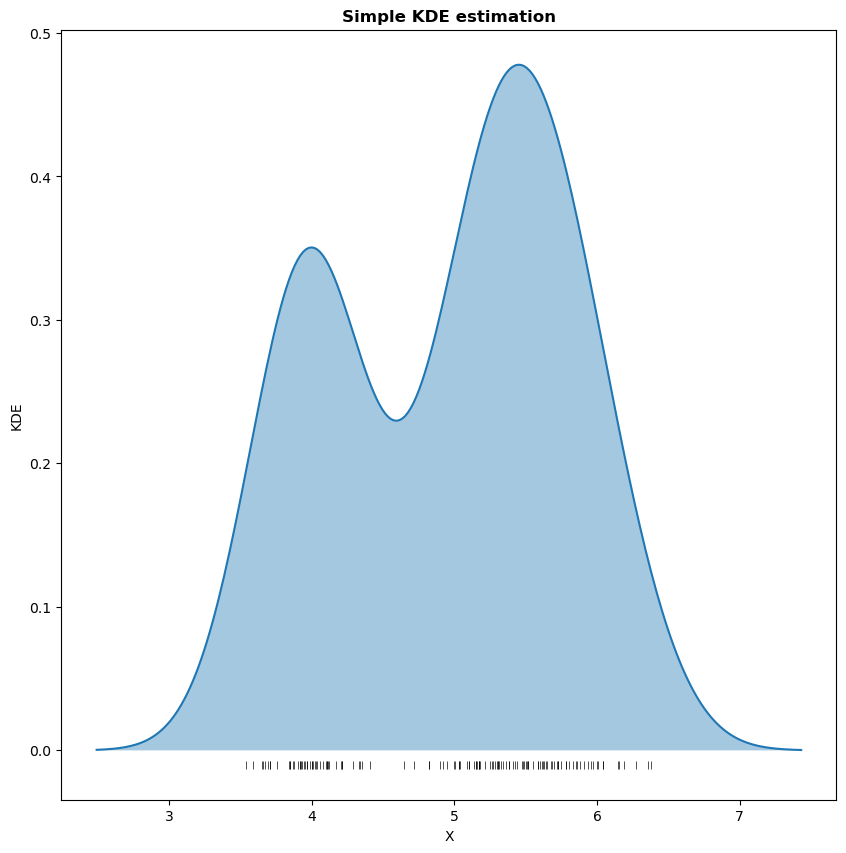

In [6]:
# Komórka testowa
test_results_1 = simple_kde_estimation(sample, estimation_points=100, sigma=0.2)
assert type(test_results_1) == pd.DataFrame
assert test_results_1.shape == (100, 2)
assert list(test_results_1.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_1.min().values, [2.94233698e+00, 3.32813073e-04]))
assert np.all(np.isclose(test_results_1.max().values, [6.98176057, 0.54688772]))
assert np.all(np.isclose(test_results_1.mean().values, [4.96204877, 0.24508447]))

test_results_2 = simple_kde_estimation(sample, estimation_points=250, sigma=0.35)
assert type(test_results_2) == pd.DataFrame
assert test_results_2.shape == (250, 2)
assert list(test_results_2.columns) == ['X', 'KDE']
assert np.all(np.isclose(test_results_2.min().values, [2.49233698e+00, 2.69768435e-04]))
assert np.all(np.isclose(test_results_2.max().values, [7.43176057, 0.47782523]))
assert np.all(np.isclose(test_results_2.mean().values, [4.96204877, 0.20164296]))

#### b) Dedykowane funkcje

Korzystając z klasy `KernelDensity` wchodzącej w skład pakietu scikit-learn dokonaj estymymacji rozkładu zestawu danych zawartego w zmiennej `sample`.

Wyniki estymacji przedstaw w postaci wykresów zawierających wyestymowaną funkcję (wykres liniowy z wypełnionym polem pod krzywą) oraz dodaną wizualną reprezentacją zestawu danych w postaci pionowych kresek zlokalizowanych poniżej wykresu.

Wykresy zestaw na dwóch figurach (2x3 pola na wykres). Przygotowując figury kieruj się wytycznymi z początku notatnika. Podczas wykonywania wykresów:
 - Figura 1:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji na 0.1,
     - ustaw identyczne zakresy osi dla wszystkich wykresów.
 - Figura 2:
     - na każdym z wykresów przedstaw wynik estymacji z wykorzystaniem innego jądra funkcji,
     - ustaw wartość parametru odpowiadającego za szerokość jądra funkcji tak, aby wynik pracy funkcji dobrze oddawał charakter rozkładu populacji z której została pobrana próba losowa,
     - ustaw identyczne zakresy osi dla wszystkich wykresów. 

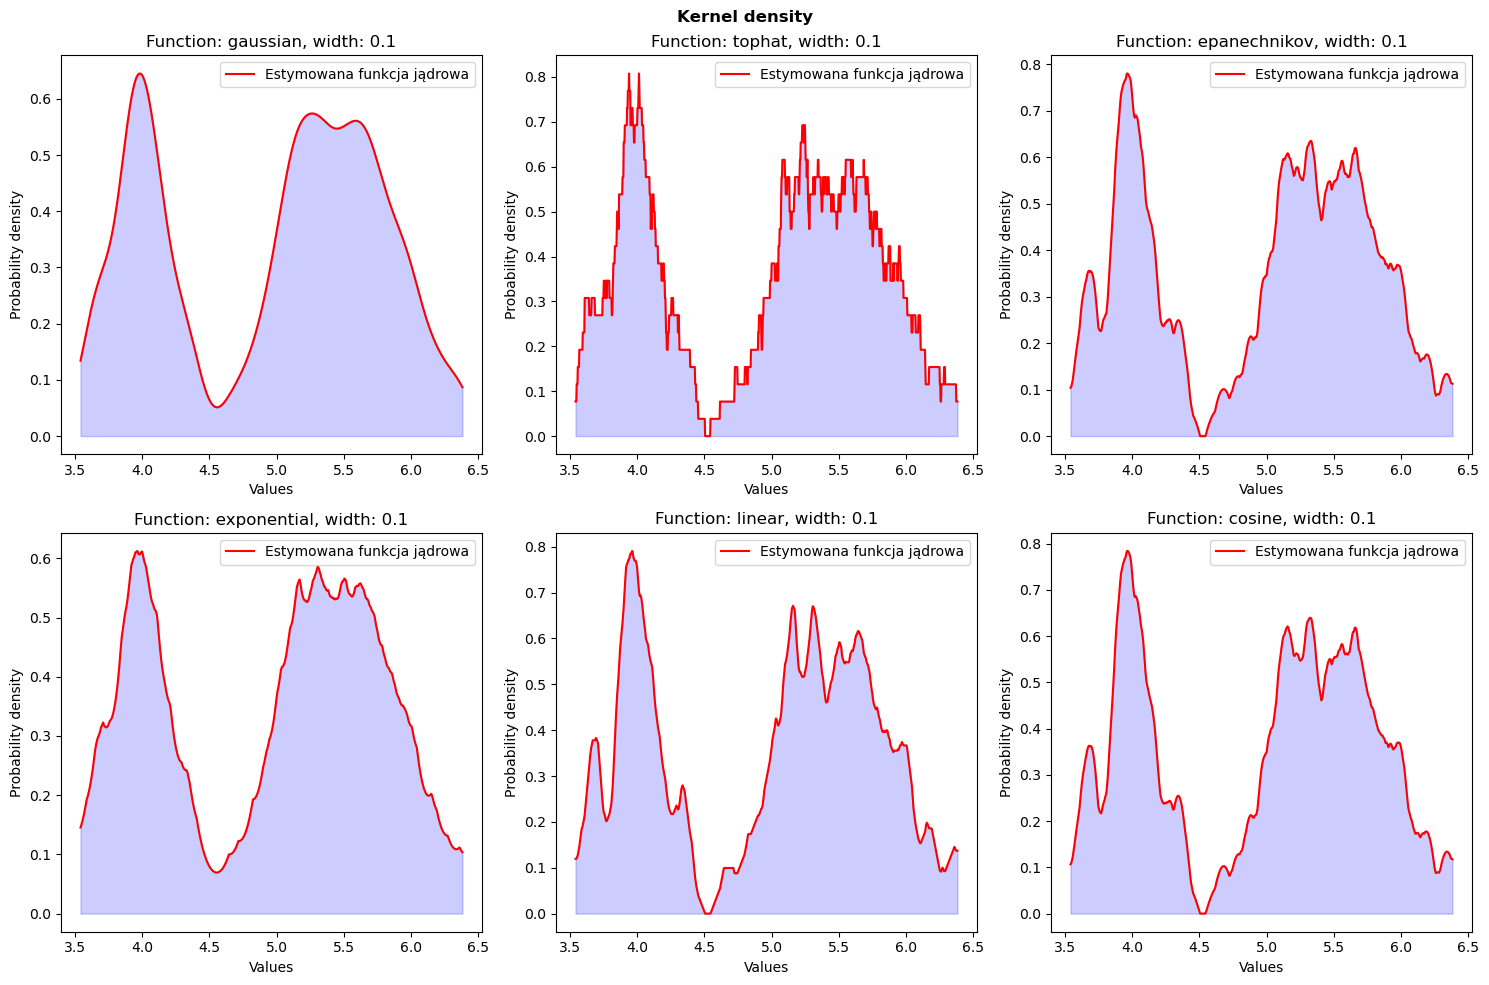

In [7]:
# Figura 1
from sklearn.neighbors import KernelDensity
def generate_plot(data, kernel, bandwidth, idx):
    kde = KernelDensity(kernel=kernel, bandwidth=bandwidth).fit(data.reshape(-1, 1))
    x = np.linspace(data.min(), data.max(), 1000)
    log_dens = kde.score_samples(x.reshape(-1, 1))
    plt.subplot(2, 3, idx)
    plt.plot(x, np.exp(log_dens), color='red', label='Estymowana funkcja jądrowa')
    plt.fill_between(x, np.exp(log_dens), color='blue', alpha=0.2)
    # plt.hist(data, bins=30, density=True, alpha=0.5, color='blue')
    plt.xlabel('Values')
    plt.ylabel('Probability density')
    plt.title(f'Function: {kernel}, width: {bandwidth:.1f}')
    plt.legend()
plt.figure(figsize=(15,10))
# tytuł figury
plt.suptitle("Kernel density", weight="bold")
kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
for idx, kernel in enumerate(kernels, 1):
    generate_plot(sample.values, kernel, 0.1, idx)
plt.tight_layout()
plt.show()

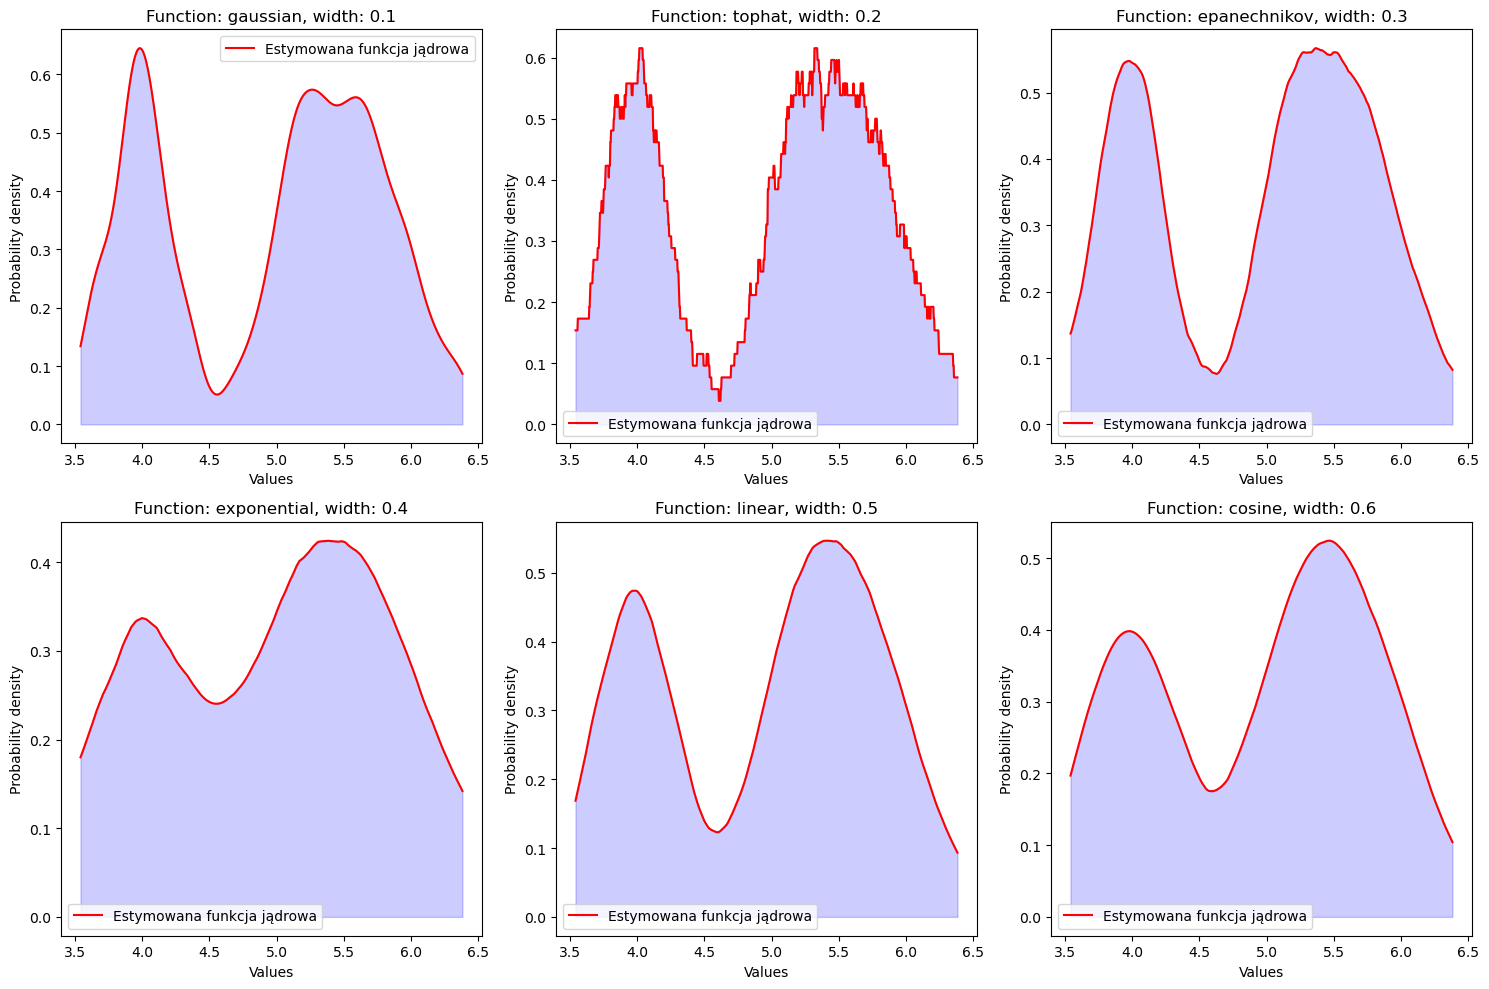

In [8]:
# Figura 2
bandwidths2 = np.linspace(0.1, len(kernels)/10, len(kernels))
plt.figure(figsize=(15,10))
for idx, (kernel, bandwidth) in enumerate(zip(kernels, bandwidths2), 1):
    generate_plot(sample.values, kernel, bandwidth, idx)
plt.tight_layout()
plt.show()

### Zadanie 3: Dyskusja wyników [6 pkt]

Przygotowane w poprzednich zadaniach wykresy są wizualną reprezentacją tego samego zestawu danych, dobór metody oraz jej parametrów sparawia jednak, że nie wyglądają one identycznie.

Przedyskutuj plusy i minusy obu metod oraz odpowiedz na pytanie w jaki sposób dobór parametrów funkcji (liczba, szerokość i położenie granic przedziałów, wykorzystana wersja oraz szerokość jadra) wpływa na poprawność i czytelność wyniku.

Metoda estymacji gęstości jądrowej:

Plusy:

-bezparametryczność: metoda nie wymaga, abyśmy znali konkretną formę rozkładu populacji. Może być stosowana do dowolnego rozkładu danych.

-zachowanie lokalnych szczegółów: KDE może uchwycić najmniejsze zmiany w rozkładzie danych, co może być przydatne w analizie szczegółowych wzorców.

-wizualizacja: dzięki KDE można przedstawić dane w sposób ciągły, co ułatwia wizualizację i interpretację rozkładu danych.

Minusy:

-wybór jądra i parametrów: dobór odpowiedniego jądra oraz parametrów (takich jak szerokość jądra) może być trudny i subiektywny. Nieprawidłowy wybór może prowadzić do błędnych wniosków.

-czułość na liczbę próbek: wynik estymacji może być wrażliwy na liczbę próbek w zbiorze danych. W przypadku niewystarczającej liczby próbek wynik może być obarczony dużą wariancją.


Dobór parametrów funkcji KDE:

-liczba i szerokość przedziałów: Liczba i szerokość przedziałów decydują o gładkości estymowanej gęstości. Zbyt duża liczba przedziałów może prowadzić do przeuczenia, podczas gdy zbyt mała liczba może prowadzić do niedoszacowania rozkładu.

-szerokość jądra: szerokość jądra kontroluje "gładkość" estymowanej gęstości. Zbyt szerokie jądro może "rozmyć" rozkład, przez co metoda jest mniej dokładna, podczas gdy zbyt wąskie może prowadzić do nadmiernej zmienności.

-wybrana wersja jądra: różne wersje jądra mogą lepiej odpowiadać różnym typom danych. Na przykład, jądro Gaussowskie dobrze sprawdza się w przypadku danych, których rozkład przypomina rozkład normalny, podczas gdy jądro Epanecznikowa może lepiej radzić sobie z danymi o cięższych ogonach rozkładu.

### Zadanie 4: Estymacja na podstawie dystybuanty [8 pkt]

Przygotuj funkcję `cdf_estimation()`, która będzie dokonywała estymacji dystrybuanty rozkładu w oparciu o dystrybuantę empiryczną oraz statystykę wyznaczaną z rozkładu Kołmogorowa-Smirnowa zgodnie z informacjami zawartymi w docstring funkcji oraz schematem z załączonego do notatnika zestawu wzorów.

Poza zwracaniem danych określonych w docstring funkcji powinna ona generować wykres liniowy dystrybuanty empirycznej z zaznaczonym przedziałem ufności oraz tytułem figury `Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha=A`, gdzie wartość A jest uzupełnianie na podstawie wartości argumentu `alpha`.

Uwagi do wykonania zadania:
 - Wartości statystyki testowej oblicz za pomocą odpowiedniej funkcji z modułu `scipy.stats.kstwo`.

In [21]:
# tu ze wzorów
def cdf_estimation(data, alpha):
    """
    Parameters
    -------
    data: DataFrame
        Tablica zawierająca domyślny indeks i pojedynczą kolumnę "X" z wartościami próby losowej.
    alpha: float
        Wartość określająca poziom istotności.
    
    Returns
    -------
    cdf: DataFrame
        Tablica zawierająca następujące kolumny:
        X - uszeregowane rosnąco wartości próby losowej,
        F_d - wartości dystrybuanty empirycznej,
        F_d_min - dolna granica przedziału ufności,
        F_d_max - górna granica przedziału ufności.
    """
    cdf = data.sort_values(by='X')
    n = len(cdf)
    cdf['F_d'] = np.arange(1, n + 1) / n # dystrybuanta empiryczna
    D_alpha = sp.stats.kstwo.ppf(1 - alpha, n) # rozkład Kosmogorova-Smirnova
    cdf["F_d_min"] = np.maximum(0, cdf["F_d"] - D_alpha)
    cdf["F_d_max"] = np.minimum(1, cdf["F_d"] + D_alpha)
    plt.plot(cdf["X"], cdf["F_d"], label="Dystrybuanta empiryczna", color='red')
    plt.plot(cdf["X"], cdf["F_d_max"], color="gray", alpha=0.7)
    plt.plot(cdf["X"], cdf["F_d_min"], color="gray", alpha=0.7)
    plt.fill_between(cdf["X"], cdf["F_d_min"], cdf["F_d_max"], color="gray", alpha=0.2, label="Przedział ufności")
    plt.xlabel("X")
    plt.ylabel("CDF")
    plt.title(f"Przedział ufności dystrybuanty rozkładu na poziomie istotności 1-alpha={1-alpha}")
    plt.legend()
    plt.show()
        # cdf['F_d_min'] = np.maximum(0, cdf['F_d'] - D_alpha) # dolna granica
    # cdf['F_d_max'] = np.minimum(1, cdf['F_d'] + D_alpha) # górna granica
    
    return cdf

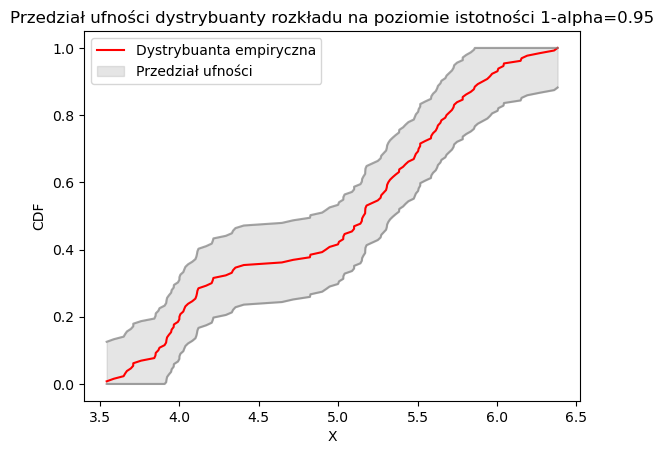

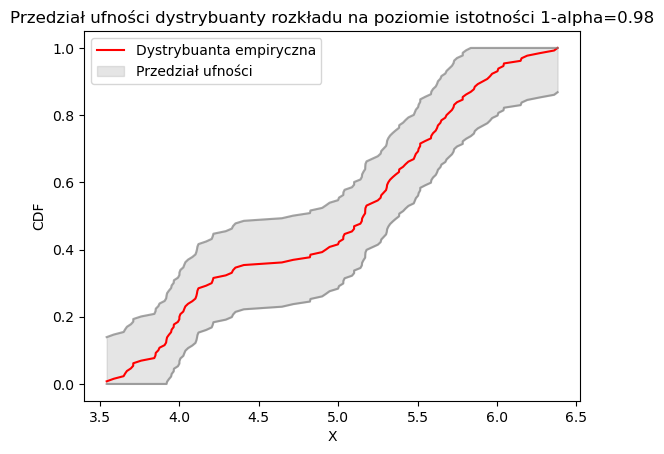

In [22]:
# Komórka testowa
test_results_3 = cdf_estimation(sample, 0.05)
assert type(test_results_3) == pd.DataFrame
assert test_results_3.shape == (130, 4)
assert list(test_results_3.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_3.min().values, [3.54233698, 0.00769231, 0., 0.12544548]))
assert np.all(np.isclose(test_results_3.max().values, [6.38176057, 1., 0.88224683, 1.]))
assert np.all(np.isclose(test_results_3.mean().values, [4.9551826 , 0.50384615, 0.3925793 , 0.61420722]))

test_results_4 = cdf_estimation(sample, 0.02)
assert type(test_results_4) == pd.DataFrame
assert test_results_4.shape == (130, 4)
assert list(test_results_4.columns) == ['X', 'F_d', 'F_d_min', 'F_d_max']
assert np.all(np.isclose(test_results_4.min().values, [3.54233698, 0.00769231, 0., 0.13935689]))
assert np.all(np.isclose(test_results_4.max().values, [6.38176057, 1., 0.86833542, 1.]))
assert np.all(np.isclose(test_results_4.mean().values, [4.9551826 , 0.50384615, 0.380346, 0.62633351]))